# Analysis of MovieLens (1996-2018)

### Content
+ Motivation
+ Objectives
+ Introduction: MovieLens
+ Data description
+ Formulation of research questions
+ Data preparation
+ Exploratory Data Analysis (EDA) and Data Visualization


# Motivation
* Comprehend the pattern in normal appraisals for various film sorts over years (from 1996 to 2018) and Correlation between the patterns for various genres.
* I think this will give us a knowledge about how individuals' preference for the diverse film genres change over the long run and about the quality of relationship between trends in the various of film kinds, experiences perhaps helpful for the film critics.


# Objectives
* First of all, it is necessary to determine which datasets from the ones presented in the dataset will be used for further data analysis
* Preparation data for analysis
* Answer research questions based on data analysis and visualization.

# 1. Introduction: MovieLens

MovieLens is a recommended movie search service that allows its users to recommend movies based on their preferences. For this reason, a comprehensive filtering of movie reviews and ratings are used. This online platform contains about 11 million ratings for approximately 8,500 films. MovieLens was created in 1997 by the GroupLens Research Laboratory at the University of Minnesota. It was created for the purpose of collecting and further research data based on personal recommendations.

It is worth noting that Movielens is not the first recommendation resource for movies. Earlier in may 1996, GroupLens presented to the world a commercial enterprise - Net Perceptions, which provided its technologies to E! Online to create a recommendation system for Moviefinder.com. 

A key factor in the creation of Movielens was the closure of another movie recommendation site eachmovie.org. After deactivating the site, the creators decided to make publicly available all the rating data they had previously collected, which was used by the GroupLens Research team led by Brent Dahlen and John Herlocker to launch a new recommendation site for movies, which we now know as MovieLens.

MovieLens also provides detailed information about movies, such as a list of actors and film Directors. Users can also submit and rate tags that can be used to improve the accuracy of the movie recommendation system.

Source: https://en.wikipedia.org/wiki/MovieLens




# 2. Data Description

From the description of MovieLens described above, it is obvious that absolutely every movie that is displayed in this recommendation system is included in it based on a number of characteristics. In this project I analyse a dataset which describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018, as it covers the transition period in cinematography, it is also possible to analyze the changing trends and standards of recommended films. Continuing on, we will utilizing the movies.csv and ratings.csv records.
Below is a classification of the data that we will analyze in our analysis:
+ user Id - is a unique identifier for users
+ movie Id - is a unique identifier for movies
+ rating - made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
+ timestamps - represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
+ title - title of a movie
+ genres - genres of the movie



##### Main data types are:
+ int: movieId, userId
+ string: title, genres
+ float: rating

# 3. Formulation of research questions

Before starting the main analysis, you need to create several research questions. Below are 5 research questions that I will try to find answers to during the analysis:

+ Are there films in this dataset that received reviews no more than 1 time?

+ On average, what is the most common rating?

+ What is the highest average rating of movies according to the number of ratings?

+ What is the order of movie genres according the popularity amoung users?

+ What trends we can find by analyzing relation between number of movies in years AND average ratings in years?

# 4. Data Preparation
### 4.1 Importing the data

To start our analysis now we need to import necessary libraries and modules which we will use later on. 

In [1]:
# import needed modules
import pandas as pd 
import numpy as np 

After introducing the main libraries and modules, now we need to load our data files using the pandas

In [2]:
df = pd.read_csv('ratings.csv')

In [3]:
movies = pd.read_csv('movies.csv', index_col= [0])

### 4.2 Overviewing of the data

We presently want to take a look of the first 5 lines of the data to see the overall design of our variables. The first column is used to represents the indexing term. In Python it starts from 0. 

In [4]:
df.head(n=5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
df.shape

(100836, 4)

In [7]:
df.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
100831,False,False,False,False
100832,False,False,False,False
100833,False,False,False,False
100834,False,False,False,False


In [8]:
movies.head(n=5)

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [9]:
movies.shape

(9742, 2)

In [10]:
movies.isnull()

,title,genres
movieId,,
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
...,...,...
193581,False,False
193583,False,False
193585,False,False


By looking on our data files that we have, I found we can use merge function to combine them together. For that reasons let us use a key - movieId column.

In [11]:
df = pd.merge(df, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [12]:
# here we extract year from title
df['year'] =df['title'].str.extract('.*\((.*)\).*',expand = False)
df.head(5)

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


# 5. Exploratory Data Analysis (EDA) and Data Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') #style for background
#to see my graphs particularly in this JN
%matplotlib inline 

Now let us create a ratings dataframe with average rating and number of ratings

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

Let us create a new dataframe where we will be getting how many number of ratings have been given with respect to the movies.

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


Now let us integrate our number of ratings column in already created dataframe.

In [17]:
ratings['number_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(n=20)

,rating,number_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


Now, it is time for our research questions. As you remember at the begginning I made a lisk of questins. 

### Are there films in this dataset that received reviews no more than 1 time?

Text(0, 0.5, 'Frequency')

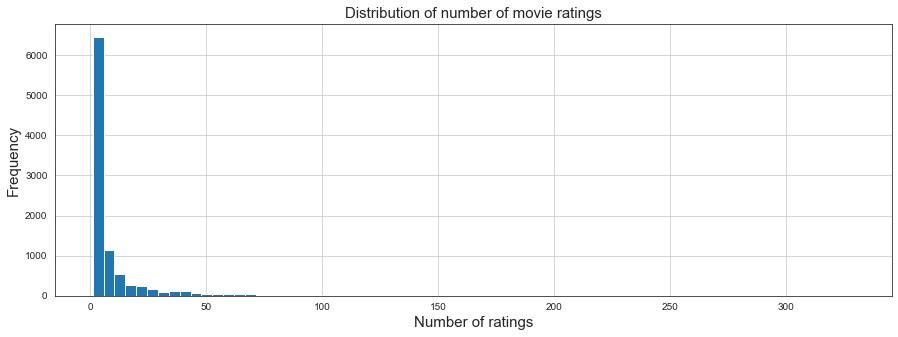

In [18]:
plt.figure(figsize=(15,5))
ratings['number_of_ratings'].hist(bins=70)
plt.title('Distribution of number of movie ratings', fontsize=15)
plt.xlabel('Number of ratings', fontsize=15)
plt.ylabel('Frequency', fontsize=15)


From this graph I can see that most films in this dataset get 1 rating mark. The number of these movies approximately equals to 6700 or 6.7% of the whole dataset.

### On average, what is the most common rating?

Text(0, 0.5, 'Count')

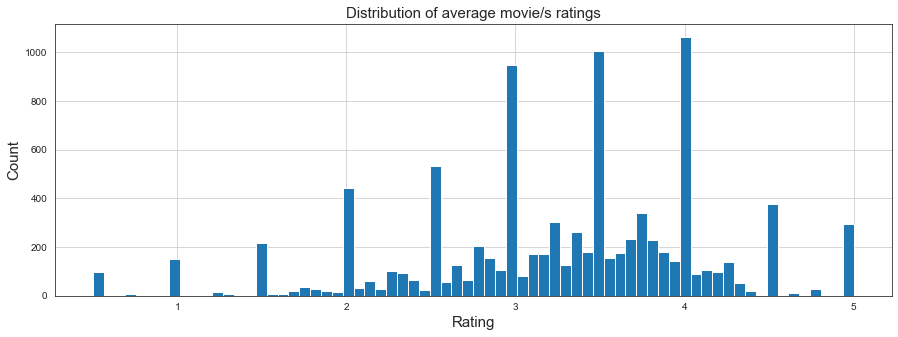

In [19]:
plt.figure(figsize=(15,5))
ratings['rating'].hist(bins=70)
plt.title('Distribution of average movie/s ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)

By looking at this graph we can found that is a normal distribution, but there are outliers. If we will make a line we will see that the common rating is 3.5.

### What is the highest average rating of movies according to the number of ratings?


Text(0.5, 0.98, 'Movie Rating')

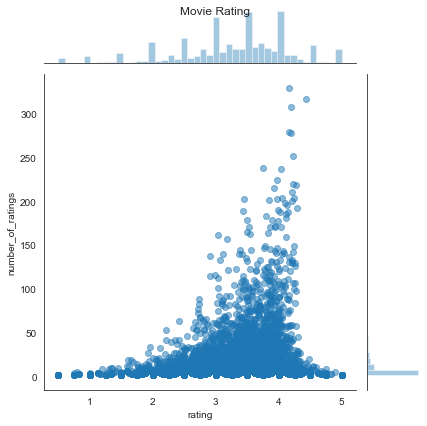

In [20]:
p = sns.jointplot(x='rating', y='number_of_ratings',data=ratings,alpha=0.5)
p.fig.suptitle("Movie Rating")

From this graph, I can see that the most common average rating is 3.5. On average, these films have approximately 50 user ratings.

In [21]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### What is the order of movie genres according the popularity amoung users?

In [22]:
#total number of unique movie genre
unique_genre=df['genres'].unique().tolist()
len(unique_genre)

951

In [23]:
#top 20 most rated movies
most_rated = df.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(20)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [24]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


In [25]:
#here we  make census of the genres:
genre_labels = set()
for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [26]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(df, 'genres', genre_labels)
keyword_occurences

[['Drama', 41928],
 ['Comedy', 39053],
 ['Action', 30635],
 ['Thriller', 26452],
 ['Adventure', 24161],
 ['Romance', 18124],
 ['Sci-Fi', 17243],
 ['Crime', 16681],
 ['Fantasy', 11834],
 ['Children', 9208],
 ['Mystery', 7674],
 ['Horror', 7291],
 ['Animation', 6988],
 ['War', 4859],
 ['IMAX', 4145],
 ['Musical', 4138],
 ['Western', 1930],
 ['Documentary', 1219],
 ['Film-Noir', 870],
 ['(no genres listed)', 47]]

### What is the order of movie genres according the popularity amoung users?

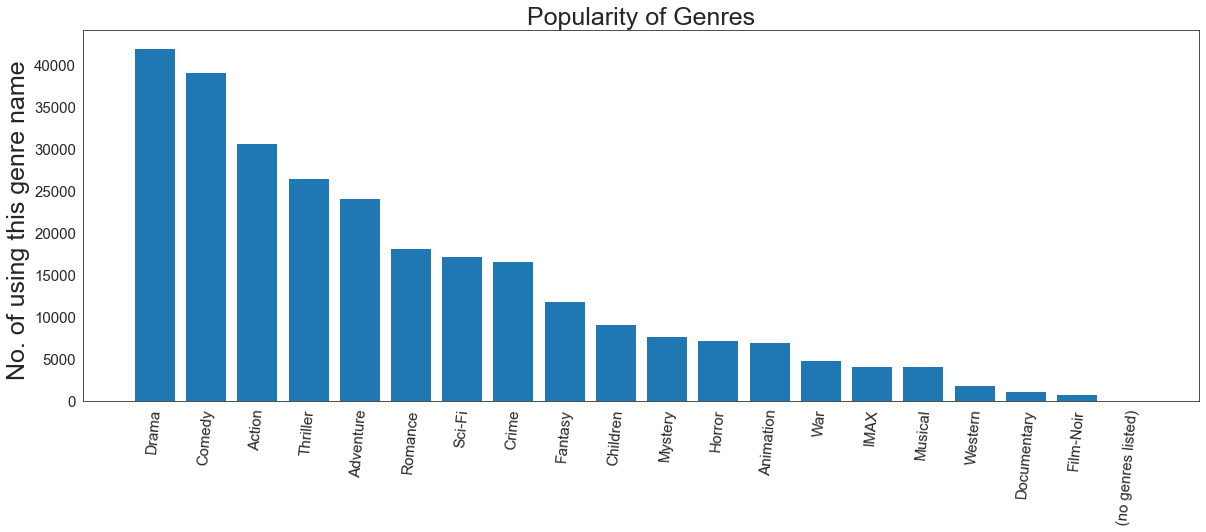

In [27]:
# lets display the result in the histogram
fig = plt.figure(1, figsize=(20,15))
ax2 = fig.add_subplot(2,1,2)
trunc_occurences = keyword_occurences[0:50]
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of using this genre name ", fontsize = 25)
ax2.bar(x_axis, y_axis, align = 'center')
plt.title("Popularity of Genres", fontsize = 25)
plt.show()

From this graph we can see the order of movie genres according to their every usage in each film. We can say that the over 40000 movies related to Drama genre. On the second place is Comedy with approximately 39000 meetings. The third one is Action movies with the number of appearing - 30000.

### What trends we can find by analyzing relation between number of movies in years AND average ratings in years?

In [33]:
sub=df[df['year']!=0]

In [39]:
avg_rates_year=df[['year','rating']].groupby('year').mean()

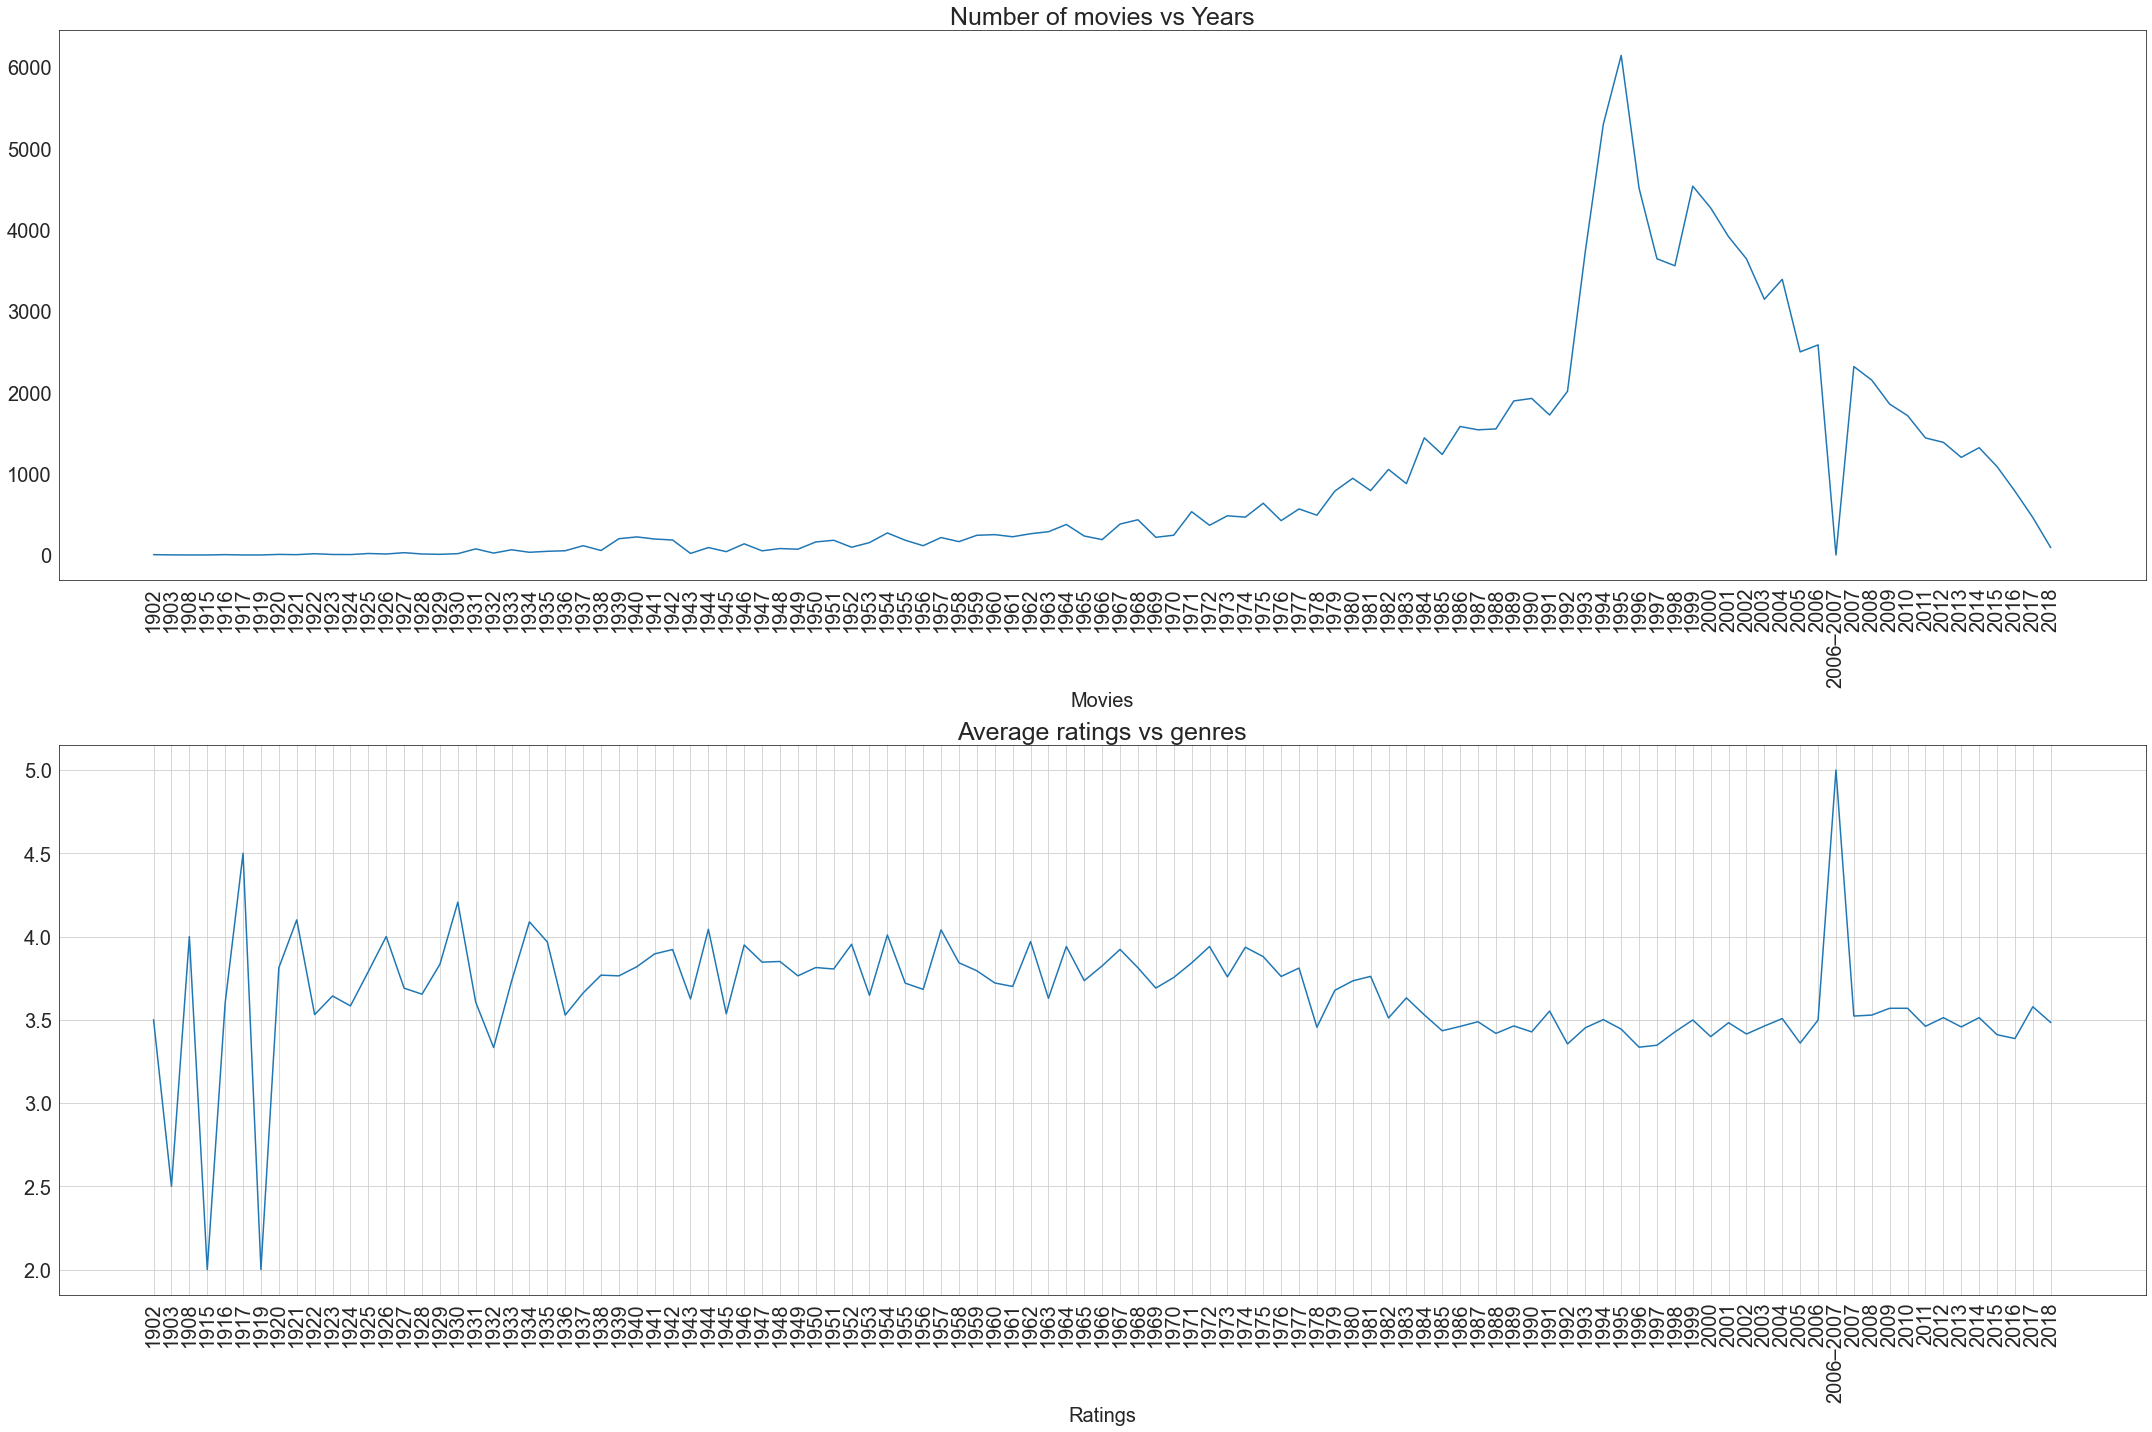

In [48]:
fig1, (ax3,ax4) = plt.subplots(2,1,figsize=(30,20))
plt.subplot(211)
plt.plot(sub.groupby(['year']).count()['title'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xlabel("Movies", fontsize=20)
plt.title('Number of movies vs Years',fontsize=25)

plt.subplot(212)
a2=plt.plot(avg_rates_year)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xlabel("Ratings", fontsize=20)
plt.title('Average ratings vs genres',fontsize=25)
plt.grid(True)
plt.tight_layout()
plt.show()

When I analyze these two graphs I found that:
+ In 1995 there were published more that 6000 movies. That was a pick point in cinema industry(I think so)
+ On the second graph we see that correlations during the years not so visible. Anyways, there are outliers: 1915,1919 - the lowest average rating (2.0), while in 2006-2007 - there is the highest rating (5.0) 

# Conclusion

Generally, I would like to say that the answers for all research questions was found. Objectives for the project also I did. Trends were analyzed. In the future, I want to recomment firstly for me to choose more carryful dataset. To avoid some troubles during the analysis.

Also, I want to add that MovieLens is a very useful source, for making the research. This and others works can be modifying in the future, to make this recommendation system more convinient to use.